In [10]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('Resources/lending_data.csv')
)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df['loan_status']

# Separate the X variable, the features
X = df.drop(columns='loan_status')

In [5]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

c:\Users\Chris\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
testing_prediction = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

[[18655   110]
 [   36   583]]


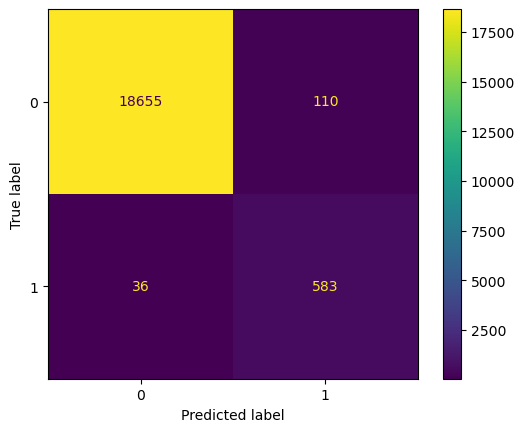

In [12]:
# Generate a confusion matrix for the model
training_matrix = confusion_matrix(y_test, testing_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=training_matrix, display_labels=logistic_regression_model.classes_)
print(training_matrix)
disp.plot()

In [13]:
# Print the classification report for the model
report = classification_report(y_test, testing_prediction)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This model has a high rate of accuracy: 0.99%. The precision, recall, and f1-score for the healthly loan labels (0) are extremely high: 1.00, 0.99, and 1.00 respectively. The same scores for the high-risk loan labels (1) are lower: 0.84, 0.94, 0.89 respectively, but overall this model still does a very good job of predicting the correct labels.

---